![Old Youtube logo](http://moziru.com/images/youtube-clipart-youtube-logo-4.png)

# Video Trends and More

by Raul Maldonado

## 1.0 Introduction

Welcome! We explore some of the interesting simple numbers of trending Youtube videos from **mid-November 2017 until January 2018.** In total, we have an estimated 50,000 records to evaluate--So, let's get started! 😊

### 1.1 Importing Modules and Data

We initially import our information and tools for this analysis. There a couple of comments to this initial process:

1. Data was provided by Kaggle User Mitchell J. in several files, but I went through the data-cleaning process in [this DataCleaning folder](../DataInspection).

2. I created a quick Descriptive Statistic function for this particular dataset. You can find this .py file in the [Resources folder](../Resources)

In [1]:
import sys

sys.path.insert(0,"../Resources/Modules")

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

#Personal function for quick Descriptive Stat Viz
import visual_descriptiveStats as vds

In [3]:
ytVid_df = pd.read_csv("../Data/youtubeVid_main.csv",sep = ",")

Quickly, we format the trend date from string format of mm/dd/yy to date format mm-dd-yy

In [4]:
ytVid_df["trending_date"] = pd.to_datetime(ytVid_df["trending_date"], format = "%m/%d/%Y")

## 1.2 Preliminary Thoughts

### 1.2.1 Question # 1

What are the top 10 trending 

1. **Youtube videos**
2. **Categories**
3. **Youtubers**

### 1.2.2 Question # 2

After identifying what countries do these Video and youtuber fans mainly come from? 

Also, do these youtube videos have more hate or liking for the video and youtuber content?

## 2.0 Analysis

The following visualization identifies the total views for every day between 11/2017-01/2018.

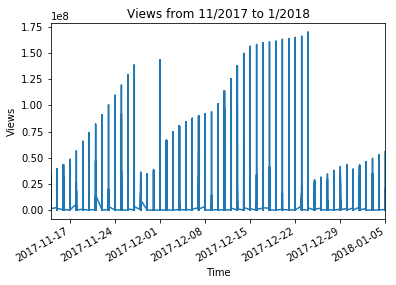

In [70]:
ytVid_df.plot(x="trending_date",y="views",grid = False,legend=False)
plt.title("Views from 11/2017 to 1/2018")
plt.xlabel("Time")
plt.ylabel("Views")
plt.show()

We observe a major increase of views within videos from the beginning of December 2017 towards its end.

This could be due to pre-selection of the sample of information from Youtube, users were on vacation during that time, or more. Assuming the above case is due to seasonality, we can asssume the shift in views is not an anomaly. 

(However, if we had a larger sample, this should be of concern)

In [71]:
daysofWeek = ytVid_df["trending_date"].apply(lambda x: x.weekday() )

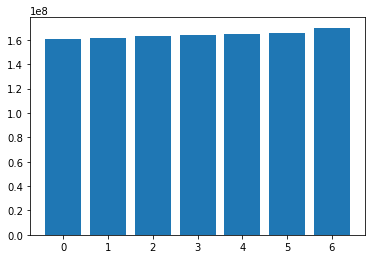

In [72]:
plt.bar(left=daysofWeek,height = ytVid_df["views"] )
plt.show()

### 2.1 Top Features from Dataset

#### 2.1.1 Top 25 Users (Channel Titles) from Nov 2017-Jan 2018

In [96]:
def pivotTab_toDF(dataset, value, indices, aggregFunct):
    dFrame = dataset.pivot_table(values = value, index= [indices], aggfunc = aggregFunct).sort_values(by = value, ascending = False)
    dFrame = pd.DataFrame(dFrame.to_records())
    dFrame.columns = [indices,"total_%s" % value]
    return(dFrame)

In [107]:
topUsers_df = pivotTab_toDF(dataset = ytVid_df, value="views", indices = "channel_title", aggregFunct = np.sum)
topUsers_df

,channel_title,total_views
0,YouTube Spotlight,4449349038
1,Marvel Entertainment,2846075809
2,Ed Sheeran,2641931783
3,EminemVEVO,1374152963
4,GEazyMusicVEVO,1234105509
5,LuisFonsiVEVO,1072037136
6,Universal Pictures,1041303256
7,jypentertainment,1030401564
8,ibighit,938882951
9,Warner Bros. Pictures,807560752


#### 2.1.2 Top 25 Youtube Video Viewers Nov 2017-Jan 2018

In [100]:
topVideo_df = pivotTab_toDF(dataset = ytVid_df, value="views", indices = "title", aggregFunct = np.sum)
topVideo_df

,title,total_views
0,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,4438297342
1,Marvel Studios' Avengers: Infinity War Officia...,2817917439
2,Ed Sheeran - Perfect (Official Music Video),1387054225
3,"Luis Fonsi, Demi Lovato - Échame La Culpa",1072037136
4,"G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi ...",977656437
5,Ed Sheeran - Perfect Duet (with Beyoncé) [Offi...,940814701
6,Jurassic World: Fallen Kingdom - Official Trai...,876289266
7,TWICE Heart Shaker M/V,848947281
8,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,840132324
9,Post Malone - rockstar ft. 21 Savage,755791106


#### 2.1.3 Top Categories from Nov 2017-Jan 2018

In [101]:
topCat_df = pivotTab_toDF(dataset = ytVid_df, value="views", indices = "category_name", aggregFunct = np.sum)
topCat_df

,category_name,total_views
0,Music,20614792820
1,Entertainment,18707340666
2,Comedy,4726380152
3,People & Blogs,3011946057
4,Film & Animation,2568710747
5,Sports,2051986484
6,Howto & Style,1927145546
7,Science & Technology,1405576001
8,News & Politics,929433367
9,Gaming,876725997


### 2.2 For Category, Youtuber, and Youtube Video, what locations are these popular fans from?


In [108]:
country_namesC = list(topUsers_df["channel_title"][0:6])
title_namesC = list(topVideo_df["title"][0:6])
category_namesC = list(topCat_df["category_name"][0:6])

In [122]:
#Youtube videos by country
a=ytVid_df.groupby(by = ["title","Country"],as_index = False)[["views","likes","dislikes","comment_count"]].sum()

aa = a[a["Country"] == "FR"]
aa[aa["views"]== aa["views"].max()]

,title,Country,views,likes,dislikes,comment_count
21288,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,FR,254277636,7949559,3850386,2675414


In [46]:
b=ytVid_df.groupby(by = ["category_name","Country"],as_index = False, sort=True)[["views","likes","dislikes","comment_count"]].sum()
#b.sort_values(by="comment_count",ascending=False)
b

,category_name,Country,views,likes,dislikes,comment_count
0,Autos & Vehicles,CA,36555351,1229138,47208,259145
1,Autos & Vehicles,DE,39165186,1605821,44479,186849
2,Autos & Vehicles,FR,12955094,605591,14175,77462
3,Autos & Vehicles,GB,104643457,2603326,84948,375332
4,Autos & Vehicles,USA,79226766,1484617,67828,212472
5,Comedy,CA,1216268456,71888826,1926908,6716478
6,Comedy,DE,484278714,25229968,746864,2664612
7,Comedy,FR,629593056,46018482,974078,2673132
8,Comedy,GB,1285753440,52786350,1599279,5351899
9,Comedy,USA,1110486486,56957635,1641407,5165284


Ideas:

Create visualizations

ask preliminary questions

Go through stats?

Do an a/b test?

do a linear regression of likes vs views?

sentiment analysis?


Should I create a dialogue surrounding likes, comments, and dislikes. Thereafter, connect that to Sentiment analysis? Lastly, then try to predict bad or good cases through regression?

## Summary

## Conclusion